In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
### Question_01 ###

In [4]:
df =pd.read_csv(r'C:\Users\Sameriah\Python_myWork\project\projectData.csv')
df.rename( columns={'Ticket #':'Ticket'} ,inplace=True)
df.head(4)

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes


In [5]:
df['Date'] = pd.to_datetime(df['Date_month_year'])
df['Month'] = df['Date'].dt.month
df['Month'].inplace = True  
df['Day'] =df['Date'].dt.day
df['Day'].inplace = True 
df.head(4)

#df.info()
#df.shape
#df[df['Month'] == 1].index.tolist() #getting all the row number of complaints made at jan

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5


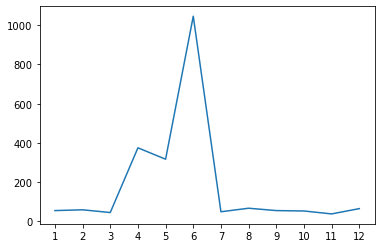

In [6]:
num_ofComplain_month = df['Month'].value_counts().to_frame().reset_index().sort_values('index')
plt.plot(num_ofComplain_month['index'], num_ofComplain_month['Month'])
plt.xticks(range(1,13))
plt.show()

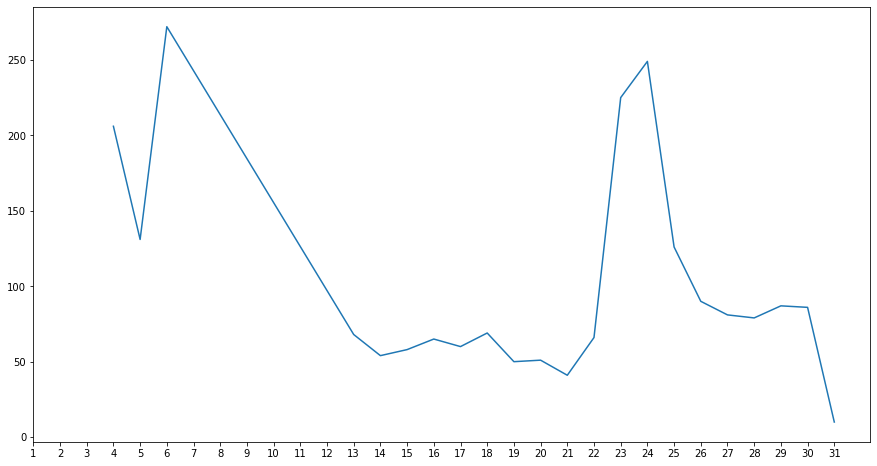

In [7]:
num_ofComplain_day = df['Day'].value_counts().to_frame().reset_index().sort_values('index')

fig =plt.figure(figsize =(15,8)) #resize the frame of the graph
plt.plot(num_ofComplain_day['index'], num_ofComplain_day['Day'])
plt.xticks(range(1,32))
plt.show()

In [8]:
zz =df[['Customer Complaint', 'Ticket']].groupby(['Customer Complaint'], as_index = False).count().sort_values('Ticket', ascending = False)
#zz.shape
#zz.loc[zz.Ticket == zz.Ticket.max()]
zz.iat[0,0]

'Comcast'

In [85]:
df['Customer Complaint'].value_counts().to_frame().sort_values('Customer Complaint', ascending = False)

,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
...,...
"CRAMMING, False Internet Promotion, SPEED complaint",1
Comcast cramming services I didn't ask for to raise my bill,1
Comcast over charge,1
charged for no seevice,1


In [9]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [10]:
def case_status(a):
    if a in ['Open', 'Pending']:
        return 'Open'
    else:
        return 'Closed'

In [11]:
df['case_status']= df['Status'].apply(case_status)
df['case_status'].inplace = True
df.head()

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,case_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed


In [12]:
df_state = df[(df.Month == 7) | (df.Month == 8) | (df.Month == 9) ]
df_state.head(4)

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,case_status
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
20,327657,Internet out all the time but they have a mono...,2015-07-06,06-Jul-15,8:55:43 PM,Customer Care Call,Alexandria,Virginia,22305,Solved,No,7,6,Closed
21,328742,horrible cable service and customer service,2015-08-06,06-Aug-15,3:18:58 PM,Internet,Alexandria,Virginia,22312,Solved,No,8,6,Closed


In [13]:
state_withMax_complaint=df[['State', 'Ticket']].groupby(['State'], as_index = False).count().sort_values('Ticket', ascending = False)
state_withMax_complaint.iat[0,0]
#state_withMax_complaint.head(2)

'Georgia'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Georgia'),
  Text(1, 0, 'Florida'),
  Text(2, 0, 'California'),
  Text(3, 0, 'Illinois'),
  Text(4, 0, 'Tennessee'),
  Text(5, 0, 'Pennsylvania'),
  Text(6, 0, 'Michigan'),
  Text(7, 0, 'Washington'),
  Text(8, 0, 'Colorado'),
  Text(9, 0, 'Maryland'),
  Text(10, 0, 'New Jersey'),
  Text(11, 0, 'Texas'),
  Text(12, 0, 'Massachusetts'),
  Text(13, 0, 'Virginia'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Oregon'),
  Text(16, 0, 'Mississippi'),
  Text(17, 0, 'Minnesota'),
  Text(18, 0, 'Alabama'),
  Text(19, 0, 'Utah'),
  Text(20, 0, 'Arizona'),
  Text(21, 0, 'South Carolina'),
  Text(22, 0, 'District Of Columbia'),
  Text(23, 0, 'New Mexico'),
  Text(24, 0, 'Louisiana'),
  Text(25, 0, 'Connecticut'),
  Text(26, 0, 'New Hampshire'),
  Text(27, 0, 'Delaware'),
  Text(28, 0, 'West V

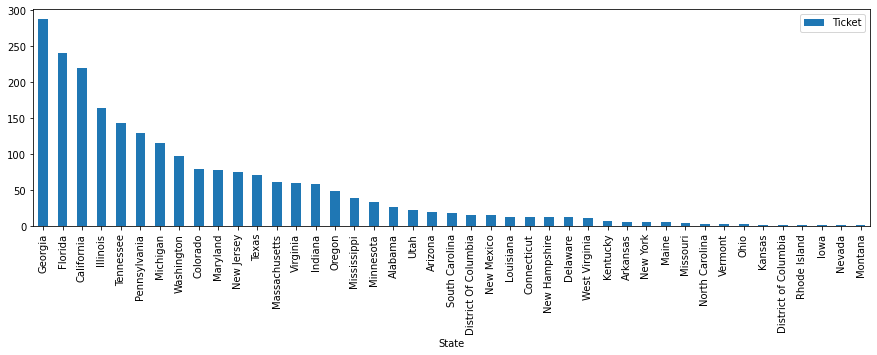

In [14]:
state_withMax_complaint.plot.bar(x='State', y='Ticket', figsize=(15, 4))
plt.xticks(rotation=90)

In [15]:
unrsolved = df_state.groupby(['State','case_status'],as_index =False)['Ticket'].count()
unrsolved.head(10)

,State,case_status,Ticket
0,Alabama,Closed,2
1,California,Closed,15
2,California,Open,1
3,Colorado,Closed,7
4,Connecticut,Closed,2
5,Florida,Closed,26
6,Florida,Open,4
7,Georgia,Closed,19
8,Georgia,Open,2
9,Illinois,Closed,20


In [75]:
unrsolved = unrsolved[unrsolved['case_status'] == 'Closed']
unrsolved =pd.merge(unrsolved, state_withMax_complaint, how = 'inner', on = 'State')
unrsolved.head(10)


,State,case_status,unrsolved_cases,Total_cases,percentage_of_unrsolved,Ticket
0,Ohio,Closed,1,3,33.0,3
1,New York,Closed,2,6,33.0,6
2,Missouri,Closed,1,4,25.0,4
3,Connecticut,Closed,2,12,17.0,12
4,Illinois,Closed,20,164,12.0,164
5,Florida,Closed,26,240,11.0,240
6,South Carolina,Closed,2,18,11.0,18
7,Massachusetts,Closed,6,61,10.0,61
8,Mississippi,Closed,4,39,10.0,39
9,West Virginia,Closed,1,11,9.0,11


In [69]:
unrsolved.rename( columns={'Ticket_x':'unrsolved_cases'} ,inplace=True)
unrsolved.rename( columns={'Ticket_y':'Total_cases'} ,inplace=True)
unrsolved['percentage_of_unrsolved']= ((unrsolved.unrsolved_cases/unrsolved.Total_cases)*100).round(decimals=0)
unrsolved.sort_values(by=['percentage_of_unrsolved'],ascending=False, inplace=True)
unrsolved.head(10)


,State,case_status,unrsolved_cases,Total_cases,percentage_of_unrsolved
17,Ohio,Closed,1,3,33.0
16,New York,Closed,2,6,33.0
12,Missouri,Closed,1,4,25.0
3,Connecticut,Closed,2,12,17.0
6,Illinois,Closed,20,164,12.0
4,Florida,Closed,26,240,11.0
20,South Carolina,Closed,2,18,11.0
9,Massachusetts,Closed,6,61,10.0
11,Mississippi,Closed,4,39,10.0
26,West Virginia,Closed,1,11,9.0


([<matplotlib.axis.YTick at 0x16178f0a640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

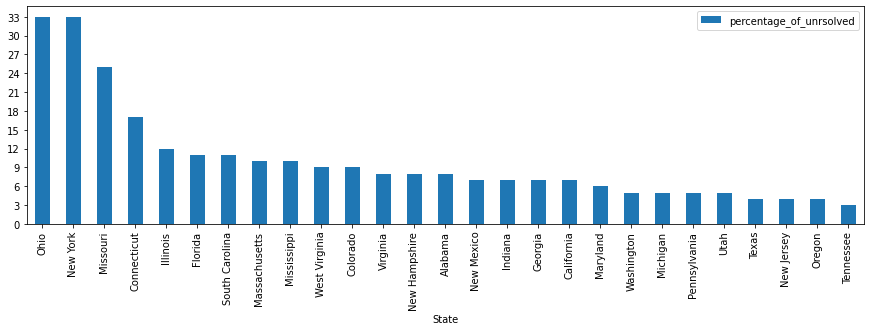

In [74]:
unrsolved.plot.bar(x='State', y='percentage_of_unrsolved', figsize=(15, 4))
plt.yticks(range(0,35,3))

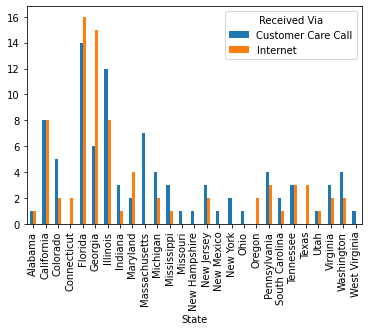

In [113]:
rec_via = pd.pivot_table(df_state, values = 'Ticket', index = 'State', columns = 'Received Via',aggfunc = lambda x: len(x)).plot.bar()
#rec_via.legend(fontsize = 14)
#rec_via.fig = plt.subplots(figsize=(12,12))